# Problem Statement

Implement linear regression from scratch using Ordinary Least Squares (OLS) method and compare it with linear regression from sklearn

# Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Dataset Description

In [2]:
dataset = pd.read_csv("/kaggle/input/calcofi/bottle.csv")

/tmp/ipykernel_20/2368306870.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("/kaggle/input/calcofi/bottle.csv")


In [3]:
dataset.shape

(864863, 74)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [5]:
#choosing only temperature and salinity cols
df = dataset[['T_degC', 'Salnty']]

In [6]:
df.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


### Dropping null values

In [7]:
df.isna().sum()

T_degC    10963
Salnty    47354
dtype: int64

In [8]:
df.dropna(axis = 0, inplace = True)

/tmp/ipykernel_20/165812464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis = 0, inplace = True)


In [9]:
df.shape

(814247, 2)

In [10]:
#taking only first 1000 rows
df = df.sample(1000)

In [11]:
df.shape

(1000, 2)

In [12]:
df.describe()

,T_degC,Salnty
count,1000.000000,1000.000000
mean,10.892001,33.853134
std,4.183828,0.454413
min,1.560000,30.480000
25%,8.000000,33.507425
50%,10.080000,33.856500
75%,13.830000,34.203950
max,27.680000,35.377000


### Linear Relationship

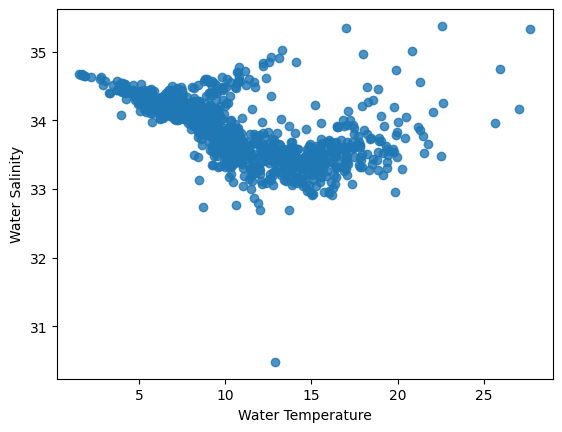

In [13]:
plt.scatter(x = df['T_degC'], y = df['Salnty'], alpha = 0.8)
plt.xlabel("Water Temperature")
plt.ylabel("Water Salinity")
plt.show()
#with temperature salinity decreases

# Train-Test Split

In [14]:
X = df['T_degC']
y = df['Salnty']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, shuffle = True)

In [16]:
X_train.shape

(700,)

# Linear Regression From Sklearn

In [17]:
regressor = LinearRegression()
regressor.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

LinearRegression()

In [18]:
m = regressor.coef_
m

array([[-0.05802125]])

In [19]:
b = regressor.intercept_
b

array([34.4925945])

In [20]:
y_pred = regressor.predict(np.array(X_test).reshape(-1,1))

### R2 score

In [21]:
r2_score(y_test, y_pred)

0.2850305795165128

### Best fit line

In [22]:
x_input = np.linspace(0, 30, 500)
y_input = m * x_input + b

In [23]:
y_input = y_input.reshape(-1, 1)

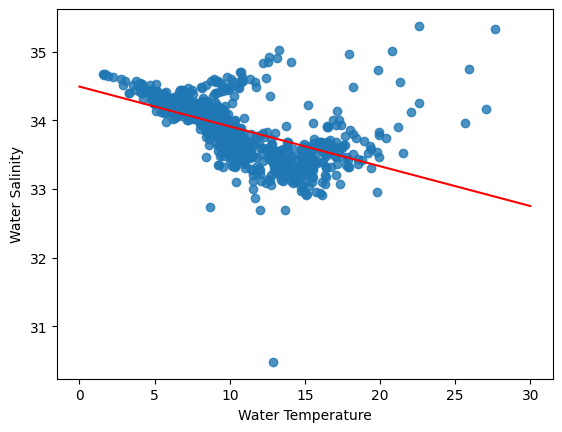

In [24]:
plt.scatter(x = X_train, y = y_train, alpha = 0.8)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Water Temperature')
plt.ylabel('Water Salinity')
plt.show()

# Linear Regression From Scratch

In [25]:
#m - slope, b = y intercept
class LinearRegressionFromScratch:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self, X_train, y_train):
        num = 0 #numerator
        den = 0 #denominator
        
        X_mean = X_train.mean()
        y_mean = y_train.mean()
        
        for i in range(X_train.shape[0]):
            num = num + ((X_train.iloc[i] - X_mean) * (y_train.iloc[i] - y_mean))
            den = den + ((X_train.iloc[i] - X_mean) * (X_train.iloc[i] - X_mean))
            
        self.m = num/den
        self.b = y_mean - (self.m * X_mean)
        return self.m, self.b
        
    def predict(self, X_test):
        y_pred = []
        for i in range(X_test.shape[0]):
            y_pred.append(self.m * X_test.iloc[i] + self.b)
        return y_pred

In [26]:
regressor = LinearRegressionFromScratch()

In [27]:
m, b = regressor.fit(X_train, y_train)

In [28]:
print(m)

-0.05802125246595463


In [29]:
print(b)

34.492594500868606


In [30]:
y_pred = regressor.predict(X_test)

### R2 score

In [31]:
r2_score(y_test, y_pred)

0.28503057951651245

### Best fit line

In [32]:
x_input = np.linspace(0, 30, 500)
y_input = m * x_input + b

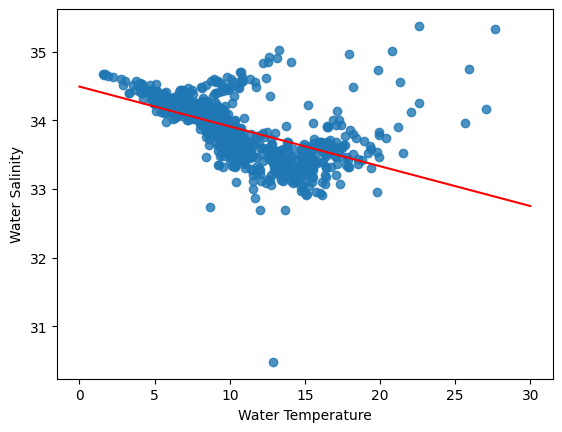

In [33]:
plt.scatter(x = X_train, y = y_train, alpha = 0.8)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Water Temperature')
plt.ylabel('Water Salinity')
plt.show()

# Inference

Sklearn uses the exact OLS method which we implemented to perform linear regression.